# Face Metrics Experiments

In [22]:
import sys
sys.path.append("..")

from newMesh import*
from PolyllaFace import PolyllaFace
import matplotlib.pyplot as plt

import time
import os

polylla_inradoius = []
polylla_circumradoius = []
polylla_area = []
polylla_e1 = []
polylla_e2 = []
polylla_tra = []
inradious = 'r'
# circumradious = 'R'
area = 'a'
tri_aspect = 'tra'
e1 ="are1"
e2 ="are2"

n_experiments = 5

In [23]:
def run_polylla(n, distribution, flag):
    filename = "../data/Experiments/"+ str(n) + distribution +".1"
    node_file = filename + ".node"
    ele_file = filename + ".ele"
    face_file = filename + ".face"

    t0 = time.time()
    mesh= FaceTetrahedronMesh(node_file, face_file, ele_file)
    polyllaFace_mesh = PolyllaFace(mesh,flag)
    tf = time.time()

    dtM = tf - t0 

    print('Tiempo:',dtM,'segs')
    edge_ratio = polyllaFace_mesh.edge_ratio()
    tetra_per_poly = polyllaFace_mesh.tetra_per_poly()
    faces_per_poly = polyllaFace_mesh.faces_per_poly()
    convex_polyhedrons = polyllaFace_mesh.convex_polyhedrons()
    polyhedron_area_ratio = polyllaFace_mesh.polyhedron_area()
    
    # print(polyllaFace_mesh.mesh.face_list[4],polyllaFace_mesh.mesh.face_list[12])
    print('\n Stats polylla:')
    polyllaFace_mesh.get_info()
    print('Polyhedrons are convex:', convex_polyhedrons*100,'%')
    filename = 'Files/polylla_'+distribution+str(n)+flag
    polyllaFace_mesh.writePolygonFile(filename)
    # print(polyllaFace_mesh.mesh.face_list[4],polyllaFace_mesh.mesh.face_list[12])
    #polyllaFace_mesh.printOFF_each_poly('../logs/polys'+flag+filename)
    os.system("./kernel "+ filename +".txt")
    polyhedrom_volume_ratio = polyllaFace_mesh.volume_ratio(filename+'_kernel_volumes')
    
    print('Mean Edge Ratio:', edge_ratio[0])
    print('Minimum Edge Ratio:', edge_ratio[1])
    print('Maximum Edge Ratio:', edge_ratio[2])
    print('Mean Tetrahedron per Polyhedron:', tetra_per_poly[0])
    print('Minimum Tetrahedron per Polyhedron:', tetra_per_poly[1])
    print('Maximum Tetrahedron per Polyhedron:', tetra_per_poly[2])
    print('Mean Faces per Polyhedron:', faces_per_poly[0])
    print('Minimum Faces per Polyhedron:', faces_per_poly[1])
    print('Maximum Faces per Polyhedron:', faces_per_poly[2])
    print('Mean Volume Ratio:', polyhedrom_volume_ratio[0])
    print('Minimum Volume Ratio:', polyhedrom_volume_ratio[1])
    print('Maximum Volume Ratio:', polyhedrom_volume_ratio[2])
    print('Polyhedrons with kernel:', round(polyhedrom_volume_ratio[3],3), '%')
    
    print('Mean Area Ratio :', polyhedron_area_ratio[0])
    print('Minimum Area Ratio :', polyhedron_area_ratio[1])
    print('Maximum Area Ratio :', polyhedron_area_ratio[2])
    

    # convex_rate = convex_polyhedrons/len(polyllaFace_mesh.polyhedral_mesh)
    print()
    return [dtM, convex_polyhedrons, edge_ratio,tetra_per_poly,faces_per_poly,polyhedrom_volume_ratio,polyhedron_area_ratio]



## Random Distribution

In [24]:
distribution = 'random'

#### n = 1000

In [25]:
n = 1000
print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.6790826320648193 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1442
Number of barrier faces: 453
Number of polyhedra with barrier faces: 298
Number of polyhedrons that are tetrahedrons: 283
Polyhedrons are convex: 85.92233009708737 %
Input: Files/polylla_random1000r.txt
Files/polylla_random1000r.txt
203 polygons
Mean Edge Ratio: 0.08741972780644938
Minimum Edge Ratio: 2.6375427105042896e-05
Maximum Edge Ratio: 0.500406121626004
Mean Tetrahedron per Polyhedron: 3.4479889042995837
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 22
Mean Faces per Polyhedron: 8.895977808599168
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 46
Mean Volume Ratio: 0.9188557193569015
Minimum Volume Ratio: 2.469817929913602e-05
Maximum Volume Ratio: 1.0000046121230735
Polyhedrons with kernel: 96.463 %
Mean Area Ratio : 0.99524

##### n = 5000

In [26]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.764707326889038 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 8444
Number of barrier faces: 2681
Number of polyhedra with barrier faces: 1819
Number of polyhedrons that are tetrahedrons: 1516
Polyhedrons are convex: 88.66650876361913 %
Input: Files/polylla_random5000r.txt
Files/polylla_random5000r.txt
957 polygons
Mean Edge Ratio: 0.09807068201935758
Minimum Edge Ratio: 1.6328152323300608e-06
Maximum Edge Ratio: 0.5229658639470173
Mean Tetrahedron per Polyhedron: 3.420416864045476
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 21
Mean Faces per Polyhedron: 8.840833728090953
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 44
Mean Volume Ratio: 0.9341385969683113
Minimum Volume Ratio: 1.411936963706147e-08
Maximum Volume Ratio: 1
Polyhedrons with kernel: 96.435 %
Mean Area Ratio : 0.9933672086621937
Min

#### n = 10000

In [27]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.965811014175415 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 16638
Number of barrier faces: 5400
Number of polyhedra with barrier faces: 3560
Number of polyhedrons that are tetrahedrons: 2999
Polyhedrons are convex: 87.37829065993509 %
Input: Files/polylla_random10000r.txt
Files/polylla_random10000r.txt
2100 polygons
Mean Edge Ratio: 0.09562927254412079
Minimum Edge Ratio: 3.260439847572092e-07
Maximum Edge Ratio: 0.6076395948365849
Mean Tetrahedron per Polyhedron: 3.4655006611371557
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 21
Mean Faces per Polyhedron: 8.931001322274312
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 44
Mean Volume Ratio: 0.9273737948630969
Minimum Volume Ratio: 1.5831860748352122e-09
Maximum Volume Ratio: 1.0000260721596923
Polyhedrons with kernel: 96.207 %
Mean Area Ratio : 

In [ ]:
n = 15000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 5.3588316440582275 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 22018
Number of barrier faces: 5935
Number of polyhedra with barrier faces: 3939
Number of polyhedrons that are tetrahedrons: 5711
Polyhedrons are convex: 18892
Input: Files/polylla_random15000r.txt
3126 polygons
Mean Edge Ratio: 0.06927792012669488
Minimum Edge Ratio: 5.773517934012927e-11
Maximum Edge Ratio: 0.7139963749402624
Mean Tetrahedron per Polyhedron: 3.221636842583341
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 29
Mean Faces per Polyhedron: 8.443273685166682
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 60
Mean Volume Ratio: 0.9207585831409457
Minimum Volume Ratio: 1.5520789613258448e-14
Maximum Volume Ratio: 1.0000351672059107
Polyhedrons with kernel: 96.607 %
Mean Area Ratio : 0.9981872594944571
Minimum Area Ratio : 0.426361895909

In [ ]:
n = 20000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 7.0768821239471436 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 29385
Number of barrier faces: 7573
Number of polyhedra with barrier faces: 5092
Number of polyhedrons that are tetrahedrons: 7938
Polyhedrons are convex: 25269
Input: Files/polylla_random20000r.txt
4116 polygons
Mean Edge Ratio: 0.06887533738544255
Minimum Edge Ratio: 1.0621682066887567e-10
Maximum Edge Ratio: 0.4739472747940802
Mean Tetrahedron per Polyhedron: 3.2004424025863534
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 25
Mean Faces per Polyhedron: 8.400884805172707
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 52
Mean Volume Ratio: 0.9248087968890704
Minimum Volume Ratio: 6.492981900017656e-10
Maximum Volume Ratio: 1.0000501687757988
Polyhedrons with kernel: 96.274 %
Mean Area Ratio : 0.9988103003754637
Minimum Area Ratio : 0.41432900244

In [ ]:
n = 30000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 10.949164390563965 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 44618
Number of barrier faces: 11344
Number of polyhedra with barrier faces: 7554
Number of polyhedrons that are tetrahedrons: 12626
Polyhedrons are convex: 38481
Input: Files/polylla_random30000r.txt
6137 polygons
Mean Edge Ratio: 0.06825894525819283
Minimum Edge Ratio: 1.088519729292154e-10
Maximum Edge Ratio: 0.6013212326365003
Mean Tetrahedron per Polyhedron: 3.1353265498229415
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 31
Mean Faces per Polyhedron: 8.270653099645882
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 64
Mean Volume Ratio: 0.9239744720270823
Minimum Volume Ratio: 1.0837433508671654e-11
Maximum Volume Ratio: 1.0001098056588316
Polyhedrons with kernel: 96.598 %
Mean Area Ratio : 0.9982972826136591
Minimum Area Ratio : 0.357465878

In [ ]:
n = 40000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 14.38157057762146 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 59860
Number of barrier faces: 14644
Number of polyhedra with barrier faces: 9793
Number of polyhedrons that are tetrahedrons: 17882
Polyhedrons are convex: 51994
Input: Files/polylla_random40000r.txt
7866 polygons
Mean Edge Ratio: 0.06621614335669875
Minimum Edge Ratio: 7.935737643111014e-11
Maximum Edge Ratio: 0.5317315615140679
Mean Tetrahedron per Polyhedron: 3.0811226194453725
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 37
Mean Faces per Polyhedron: 8.162245238890746
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 76
Mean Volume Ratio: 0.9265305442162033
Minimum Volume Ratio: 6.966028467919051e-10
Maximum Volume Ratio: 1.0000782145852571
Polyhedrons with kernel: 96.751 %
Mean Area Ratio : 0.9984139914270654
Minimum Area Ratio : 0.37989109561

In [ ]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 17.163005352020264 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 75495
Number of barrier faces: 18244
Number of polyhedra with barrier faces: 12174
Number of polyhedrons that are tetrahedrons: 22856
Polyhedrons are convex: 65797
Input: Files/polylla_random50000r.txt
9698 polygons
Mean Edge Ratio: 0.06597529201837503
Minimum Edge Ratio: 3.0746362551537676e-12
Maximum Edge Ratio: 0.6001744059089331
Mean Tetrahedron per Polyhedron: 3.0517915093714816
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 42
Mean Faces per Polyhedron: 8.103583018742963
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 86
Mean Volume Ratio: 0.9296078483339224
Minimum Volume Ratio: 7.435752213035279e-11
Maximum Volume Ratio: 1.0000955500579196
Polyhedrons with kernel: 96.748 %
Mean Area Ratio : 0.9985292066283088
Minimum Area Ratio : 0.37444278

## Poisson Distribution

In [28]:
distribution = 'poisson'

#### n = 1000

In [29]:
n = 1000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.2488558292388916 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1478
Number of barrier faces: 367
Number of polyhedra with barrier faces: 268
Number of polyhedrons that are tetrahedrons: 241
Polyhedrons are convex: 90.79837618403248 %
Input: Files/polylla_poisson1000r.txt
Files/polylla_poisson1000r.txt
136 polygons
Mean Edge Ratio: 0.2271307414754175
Minimum Edge Ratio: 0.00015774450481362398
Maximum Edge Ratio: 0.6143980881256411
Mean Tetrahedron per Polyhedron: 3.2212449255751014
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 14
Mean Faces per Polyhedron: 8.442489851150203
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 30
Mean Volume Ratio: 0.9525688704940934
Minimum Volume Ratio: 0.00036173993522780137
Maximum Volume Ratio: 1.0000058145486537
Polyhedrons with kernel: 97.835 %
Mean Area Ratio : 0.99

#### n = 5000

In [30]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.3985278606414795 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 8577
Number of barrier faces: 2427
Number of polyhedra with barrier faces: 1778
Number of polyhedrons that are tetrahedrons: 1452
Polyhedrons are convex: 93.41261513349656 %
Input: Files/polylla_poisson5000r.txt
Files/polylla_poisson5000r.txt
565 polygons
Mean Edge Ratio: 0.2784888115046035
Minimum Edge Ratio: 0.0004100530568971693
Maximum Edge Ratio: 0.6884988090388837
Mean Tetrahedron per Polyhedron: 3.1948233648128714
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 16
Mean Faces per Polyhedron: 8.389646729625744
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 34
Mean Volume Ratio: 0.958377443828445
Minimum Volume Ratio: 1.1480578013569055e-07
Maximum Volume Ratio: 1.0000104889830266
Polyhedrons with kernel: 98.624 %
Mean Area Ratio : 0.9

#### n = 10000

In [31]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.112828016281128 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 17931
Number of barrier faces: 4768
Number of polyhedra with barrier faces: 3493
Number of polyhedrons that are tetrahedrons: 2930
Polyhedrons are convex: 92.01940772963026 %
Input: Files/polylla_poisson10000r.txt
Files/polylla_poisson10000r.txt
1431 polygons
Mean Edge Ratio: 0.2609482842702115
Minimum Edge Ratio: 2.74196129490158e-05
Maximum Edge Ratio: 0.8947795086407915
Mean Tetrahedron per Polyhedron: 3.248062015503876
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 20
Mean Faces per Polyhedron: 8.496124031007753
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 42
Mean Volume Ratio: 0.9542899711579826
Minimum Volume Ratio: 3.438755072912692e-07
Maximum Volume Ratio: 1.0000115901768751
Polyhedrons with kernel: 98.199 %
Mean Area Ratio : 0.

##### n = 5000

In [ ]:
n = 15000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 4.947606801986694 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 21957
Number of barrier faces: 4941
Number of polyhedra with barrier faces: 3617
Number of polyhedrons that are tetrahedrons: 5207
Polyhedrons are convex: 19495
Input: Files/polylla_poisson15000r.txt
2462 polygons
Mean Edge Ratio: 0.19341182732868076
Minimum Edge Ratio: 1.4970420863909812e-09
Maximum Edge Ratio: 0.7574740338196262
Mean Tetrahedron per Polyhedron: 3.109031288427381
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 27
Mean Faces per Polyhedron: 8.218062576854761
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 56
Mean Volume Ratio: 0.9404136370923187
Minimum Volume Ratio: 7.710840629672535e-08
Maximum Volume Ratio: 1.0000431230536262
Polyhedrons with kernel: 98.046 %
Mean Area Ratio : 1.0021036752726535
Minimum Area Ratio : 0.674579782513

#### n = 10000

In [ ]:
n = 20000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.440546274185181 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 29105
Number of barrier faces: 6377
Number of polyhedra with barrier faces: 4644
Number of polyhedrons that are tetrahedrons: 7206
Polyhedrons are convex: 25826
Input: Files/polylla_poisson20000r.txt
3279 polygons
Mean Edge Ratio: 0.1933712876613003
Minimum Edge Ratio: 8.535703836284431e-12
Maximum Edge Ratio: 0.8752521139676175
Mean Tetrahedron per Polyhedron: 3.0779934719120425
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 24
Mean Faces per Polyhedron: 8.155986943824086
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 50
Mean Volume Ratio: 0.9389027700324867
Minimum Volume Ratio: 2.4656310504766626e-09
Maximum Volume Ratio: 1.0000455316848649
Polyhedrons with kernel: 97.983 %
Mean Area Ratio : 1.0025370846889672
Minimum Area Ratio : 0.710682659411

In [ ]:
n = 30000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 9.898459196090698 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 45194
Number of barrier faces: 9547
Number of polyhedra with barrier faces: 7089
Number of polyhedrons that are tetrahedrons: 11862
Polyhedrons are convex: 40546
Input: Files/polylla_poisson30000r.txt
4648 polygons
Mean Edge Ratio: 0.19443361204635
Minimum Edge Ratio: 1.4120100279547856e-11
Maximum Edge Ratio: 0.7736729772228472
Mean Tetrahedron per Polyhedron: 3.000553170774882
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 38
Mean Faces per Polyhedron: 8.001106341549763
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 78
Mean Volume Ratio: 0.942192626163766
Minimum Volume Ratio: 6.7905600790749734e-15
Maximum Volume Ratio: 1.0000646799635233
Polyhedrons with kernel: 98.307 %
Mean Area Ratio : 1.0021031886185725
Minimum Area Ratio : 0.68535823203059

In [ ]:
n = 40000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 12.930665731430054 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 60381
Number of barrier faces: 12515
Number of polyhedra with barrier faces: 9428
Number of polyhedrons that are tetrahedrons: 16316
Polyhedrons are convex: 54298
Input: Files/polylla_poisson40000r.txt
6083 polygons
Mean Edge Ratio: 0.1940689816260366
Minimum Edge Ratio: 1.9570332722835228e-12
Maximum Edge Ratio: 0.7669513882054183
Mean Tetrahedron per Polyhedron: 2.9697752604296053
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 37
Mean Faces per Polyhedron: 7.9395505208592105
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 76
Mean Volume Ratio: 0.9428171041290739
Minimum Volume Ratio: 2.9330095681549374e-12
Maximum Volume Ratio: 1.0000584722126515
Polyhedrons with kernel: 98.352 %
Mean Area Ratio : 1.002090948131743
Minimum Area Ratio : 0.66302206

In [ ]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 17.174348831176758 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 76336
Number of barrier faces: 15837
Number of polyhedra with barrier faces: 11825
Number of polyhedrons that are tetrahedrons: 21503
Polyhedrons are convex: 68922
Input: Files/polylla_poisson50000r.txt
7414 polygons
Mean Edge Ratio: 0.19378891287954467
Minimum Edge Ratio: 1.1417429413263857e-11
Maximum Edge Ratio: 0.7529104446109678
Mean Tetrahedron per Polyhedron: 2.926600817438692
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 33
Mean Faces per Polyhedron: 7.853201634877384
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 68
Mean Volume Ratio: 0.9445869779151954
Minimum Volume Ratio: 6.119825939622937e-12
Maximum Volume Ratio: 1.0000753968932623
Polyhedrons with kernel: 98.373 %
Mean Area Ratio : 1.0019708413657382
Minimum Area Ratio : 0.60785311

## Semiuniform Distribution

In [32]:
distribution = 'semiuniform'

#### n = 1000

In [33]:
n = 1000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.1959695816040039 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1467
Number of barrier faces: 372
Number of polyhedra with barrier faces: 271
Number of polyhedrons that are tetrahedrons: 270
Polyhedrons are convex: 94.88752556237219 %
Input: Files/polylla_semiuniform1000r.txt
Files/polylla_semiuniform1000r.txt
75 polygons
Mean Edge Ratio: 0.33263131982049743
Minimum Edge Ratio: 0.08006956887388689
Maximum Edge Ratio: 0.6874688794615804
Mean Tetrahedron per Polyhedron: 3.1022494887525562
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 13
Mean Faces per Polyhedron: 8.204498977505112
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 28
Mean Volume Ratio: 0.9692195323971792
Minimum Volume Ratio: 1.248572911882705e-06
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.705 %
Mean Area Ratio : 0.995780451314225

#### n = 5000

In [34]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.4468200206756592 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 8234
Number of barrier faces: 2177
Number of polyhedra with barrier faces: 1591
Number of polyhedrons that are tetrahedrons: 1426
Polyhedrons are convex: 95.14209375759047 %
Input: Files/polylla_semiuniform5000r.txt
Files/polylla_semiuniform5000r.txt
400 polygons
Mean Edge Ratio: 0.36134680389275836
Minimum Edge Ratio: 0.11212728358914666
Maximum Edge Ratio: 0.7167931227445843
Mean Tetrahedron per Polyhedron: 3.1558173427252854
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 19
Mean Faces per Polyhedron: 8.31163468545057
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 40
Mean Volume Ratio: 0.967587612010649
Minimum Volume Ratio: 1.429292658353868e-05
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.956 %
Mean Area Ratio : 0.9953534496369

#### n = 10000

In [35]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.4088680744171143 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 17216
Number of barrier faces: 4671
Number of polyhedra with barrier faces: 3426
Number of polyhedrons that are tetrahedrons: 2957
Polyhedrons are convex: 94.6096654275093 %
Input: Files/polylla_semiuniform10000r.txt
Files/polylla_semiuniform10000r.txt
928 polygons
Mean Edge Ratio: 0.3588515428811739
Minimum Edge Ratio: 0.10340858504722493
Maximum Edge Ratio: 0.8115427848597535
Mean Tetrahedron per Polyhedron: 3.166182620817844
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 17
Mean Faces per Polyhedron: 8.332365241635689
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 36
Mean Volume Ratio: 0.9656234852193557
Minimum Volume Ratio: 3.50534856446141e-09
Maximum Volume Ratio: 1.0000055676047264
Polyhedrons with kernel: 98.699 %
Mean Area Ratio

##### n = 5000

In [ ]:
n = 15000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 6.228424549102783 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 25940
Number of barrier faces: 7120
Number of polyhedra with barrier faces: 5096
Number of polyhedrons that are tetrahedrons: 4469
Polyhedrons are convex: 24611
Input: Files/polylla_semiuniform15000r.txt
1329 polygons
Mean Edge Ratio: 0.36196000254800204
Minimum Edge Ratio: 0.10474920425722513
Maximum Edge Ratio: 0.7609865519956869
Mean Tetrahedron per Polyhedron: 3.168272937548188
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 18
Mean Faces per Polyhedron: 8.336545875096377
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 38
Mean Volume Ratio: 0.9663274923289
Minimum Volume Ratio: 1.496292500214059e-11
Maximum Volume Ratio: 1.000000443619988
Polyhedrons with kernel: 98.778 %
Mean Area Ratio : 0.9952324146086036
Minimum Area Ratio : 0.832632171457675

#### n = 10000

In [ ]:
n = 20000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 7.684200286865234 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 34797
Number of barrier faces: 9411
Number of polyhedra with barrier faces: 6946
Number of polyhedrons that are tetrahedrons: 5876
Polyhedrons are convex: 32996
Input: Files/polylla_semiuniform20000r.txt
1801 polygons
Mean Edge Ratio: 0.36119588775757105
Minimum Edge Ratio: 0.1061721429515459
Maximum Edge Ratio: 0.784428741672122
Mean Tetrahedron per Polyhedron: 3.1842112825818316
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 18
Mean Faces per Polyhedron: 8.368422565163664
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 38
Mean Volume Ratio: 0.9654332737335332
Minimum Volume Ratio: 1.0155645126981643e-08
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.856 %
Mean Area Ratio : 0.9949484498366279
Minimum Area Ratio : 0.8501150557470266
Maximum Are

In [ ]:
n = 30000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 11.037623405456543 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 52844
Number of barrier faces: 14605
Number of polyhedra with barrier faces: 10637
Number of polyhedrons that are tetrahedrons: 8818
Polyhedrons are convex: 50170
Input: Files/polylla_semiuniform30000r.txt
2674 polygons
Mean Edge Ratio: 0.3645790892890047
Minimum Edge Ratio: 0.08789425477483974
Maximum Edge Ratio: 0.8587046344762427
Mean Tetrahedron per Polyhedron: 3.1862084626447658
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 19
Mean Faces per Polyhedron: 8.372416925289532
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 40
Mean Volume Ratio: 0.9665411923620224
Minimum Volume Ratio: 3.9148799145277304e-11
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.806 %
Mean Area Ratio : 0.9948801161245187
Minimum Area Ratio : 0.831516356028955
Maximum 

In [ ]:
n = 40000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 16.999715328216553 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 71150
Number of barrier faces: 19648
Number of polyhedra with barrier faces: 14331
Number of polyhedrons that are tetrahedrons: 11936
Polyhedrons are convex: 67507
Input: Files/polylla_semiuniform40000r.txt
3643 polygons
Mean Edge Ratio: 0.36508875110512806
Minimum Edge Ratio: 0.10121089933313275
Maximum Edge Ratio: 0.8051942975515165
Mean Tetrahedron per Polyhedron: 3.191328179901616
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 22
Mean Faces per Polyhedron: 8.382656359803233
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 46
Mean Volume Ratio: 0.9666188893202717
Minimum Volume Ratio: 1.8798205685434865e-11
Maximum Volume Ratio: 1
Polyhedrons with kernel: 98.707 %
Mean Area Ratio : 0.9948550506005597
Minimum Area Ratio : 0.8357460342838358
Maximu

In [ ]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 21.41014313697815 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 89265
Number of barrier faces: 24708
Number of polyhedra with barrier faces: 17934
Number of polyhedrons that are tetrahedrons: 14945
Polyhedrons are convex: 84719
Input: Files/polylla_semiuniform50000r.txt
4546 polygons
Mean Edge Ratio: 0.36455260230024666
Minimum Edge Ratio: 0.08752381039014448
Maximum Edge Ratio: 0.8841966729496907
Mean Tetrahedron per Polyhedron: 3.1965832073040947
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 21
Mean Faces per Polyhedron: 8.393166414608189
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 44
Mean Volume Ratio: 0.966623790114736
Minimum Volume Ratio: 7.036742104740917e-09
Maximum Volume Ratio: 1.0000087150097947
Polyhedrons with kernel: 98.713 %
Mean Area Ratio : 0.9948277494842709
Minimum Area Ratio : 0.83488266

## Uniform Distribution

In [36]:
distribution = 'uniform'

In [37]:
n = 1000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 0.16874408721923828 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 1299
Number of barrier faces: 1088
Number of polyhedra with barrier faces: 258
Number of polyhedrons that are tetrahedrons: 298
Polyhedrons are convex: 72.20939183987683 %
Input: Files/polylla_uniform1000r.txt
Files/polylla_uniform1000r.txt
361 polygons
Mean Edge Ratio: 0.333333333333333
Minimum Edge Ratio: 0.33333333333333265
Maximum Edge Ratio: 0.33333333333333337
Mean Tetrahedron per Polyhedron: 3.3502694380292533
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 15
Mean Faces per Polyhedron: 8.700538876058507
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 32
Mean Volume Ratio: 0.9028944640483427
Minimum Volume Ratio: 1.01249352e-11
Maximum Volume Ratio: 1.0000101240000001
Polyhedrons with kernel: 90.916 %
Mean Area Ratio : 0.98461410944

kernel: ../3D-Polylla/polyhedron_kernel-main/cinolib/include/cinolib/meshes/abstract_polygonmesh.cpp:492: double cinolib::AbstractPolygonMesh<M, V, E, P>::mesh_volume() const [with M = cinolib::Mesh_std_attributes; V = cinolib::Vert_std_attributes; E = cinolib::Edge_std_attributes; P = cinolib::Polygon_std_attributes]: Assertion `vol >= 0' failed.
Aborted


IndexError: pop from empty list

In [38]:
n = 5000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 1.3730621337890625 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 7126
Number of barrier faces: 5387
Number of polyhedra with barrier faces: 1616
Number of polyhedrons that are tetrahedrons: 1464
Polyhedrons are convex: 69.32360370474319 %
Input: Files/polylla_uniform5000r.txt
Files/polylla_uniform5000r.txt
2186 polygons
Mean Edge Ratio: 0.3333333333333333
Minimum Edge Ratio: 0.3333333333333333
Maximum Edge Ratio: 0.3333333333333333
Mean Tetrahedron per Polyhedron: 3.4438675273645805
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 20
Mean Faces per Polyhedron: 8.887735054729161
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 42
Mean Volume Ratio: 0.9027799280739356
Minimum Volume Ratio: 0.0833333248
Maximum Volume Ratio: 1.0000023552000001
Polyhedrons with kernel: 91.271 %
Mean Area Ratio : 0.985586466207

In [39]:
n = 10000

print("inradius")
polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
print("area")
polylla_mesh_area = run_polylla(n,distribution,area)
print("aspect ratio 1")
polylla_mesh_e1 = run_polylla(n,distribution, e1)
print("aspect ratio 2")
polylla_mesh_e2 = run_polylla(n,distribution, e2)
print("triangle aspect")
polylla_mesh_tra = run_polylla(n,distribution, tri_aspect)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius .append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)
polylla_e1.append(polylla_mesh_e1)
polylla_e2.append(polylla_mesh_e2)
polylla_tra.append(polylla_mesh_tra)

inradius
Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 3.5565996170043945 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 15939
Number of barrier faces: 13781
Number of polyhedra with barrier faces: 3433
Number of polyhedrons that are tetrahedrons: 3190
Polyhedrons are convex: 70.2365267582659 %
Input: Files/polylla_uniform10000r.txt
Files/polylla_uniform10000r.txt
4744 polygons
Mean Edge Ratio: 0.33333333333333265
Minimum Edge Ratio: 0.3333333333333318
Maximum Edge Ratio: 0.3333333333333333
Mean Tetrahedron per Polyhedron: 3.4787627831106094
Minimum Tetrahedron per Polyhedron: 1
Maximum Tetrahedron per Polyhedron: 24
Mean Faces per Polyhedron: 8.957525566221218
Minimum Faces per Polyhedron: 4
Maximum Faces per Polyhedron: 50
Mean Volume Ratio: 0.8983802490120095
Minimum Volume Ratio: 1.322947079999998e-15
Maximum Volume Ratio: 5.000173189199997
Polyhedrons with kernel: 90.068 %
Mean Area Ratio : 0.

kernel: ../3D-Polylla/polyhedron_kernel-main/cinolib/include/cinolib/meshes/abstract_polygonmesh.cpp:492: double cinolib::AbstractPolygonMesh<M, V, E, P>::mesh_volume() const [with M = cinolib::Mesh_std_attributes; V = cinolib::Vert_std_attributes; E = cinolib::Edge_std_attributes; P = cinolib::Polygon_std_attributes]: Assertion `vol >= 0' failed.
Aborted


ValueError: invalid literal for int() with base 10: '7.19851e-05'

In [ ]:
n = 15000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

Reading vertex file
Reading face file
Processing edges
Reading tetra file
Processesing faces with tetrahedorns
Tiempo: 5.677464723587036 segs

 Stats polylla:
PolyllaFace info:
Number of polyhedrons: 27209
Number of barrier faces: 7943
Number of polyhedra with barrier faces: 4020
Number of polyhedrons that are tetrahedrons: 3325
Polyhedrons are convex: 21821
Input: Files/polylla_uniform15000r.txt


kernel: ../3D-Polylla/polyhedron_kernel-main/cinolib/include/cinolib/meshes/abstract_polygonmesh.cpp:492: double cinolib::AbstractPolygonMesh<M, V, E, P>::mesh_volume() const [with M = cinolib::Mesh_std_attributes; V = cinolib::Vert_std_attributes; E = cinolib::Edge_std_attributes; P = cinolib::Polygon_std_attributes]: Assertion `vol >= 0' failed.
Aborted (core dumped)


IndexError: pop from empty list

In [ ]:
n = 20000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

In [ ]:
n = 30000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

In [ ]:
n = 40000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

In [ ]:
n = 50000

polylla_mesh_inradious = run_polylla(n,distribution,inradious)
# polylla_mesh_circumradious = run_polylla(n,distribution,circumradious)
polylla_mesh_area = run_polylla(n,distribution,area)

polylla_inradoius.append(polylla_mesh_inradious)
# polylla_circumradoius.append(polylla_circumradoius)
polylla_area.append(polylla_mesh_area)

[0.9095890410958904, 0.9303135888501742, 0.9264038654174769]


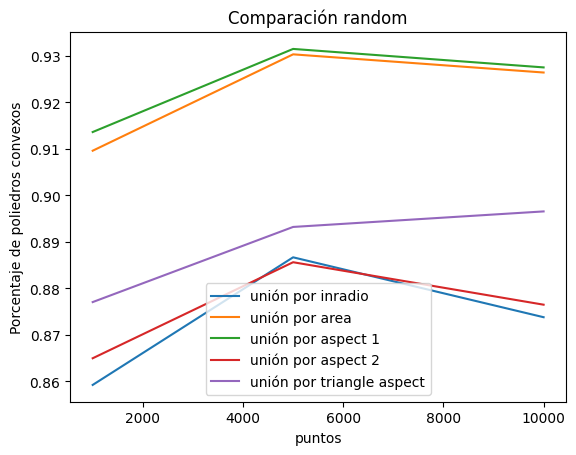

In [42]:

puntos = [1000,5000,10000]
convex_polys_ir = [polylla_inradoius[i][1] for i in range(len(puntos))]
convex_polys_a = [polylla_area[i][1] for i in range(len(puntos))]
convex_polys_e1 = [polylla_e1[i][1] for i in range(len(puntos))]
convex_polys_e2 = [polylla_e2[i][1] for i in range(len(puntos))]
convex_polys_tra = [polylla_tra[i][1] for i in range(len(puntos))]
print(convex_polys_a)

plt.plot(puntos,convex_polys_ir, label = 'unión por inradio')
plt.plot(puntos, convex_polys_a, label = 'unión por area')
plt.plot(puntos, convex_polys_e1, label = 'unión por aspect 1')
plt.plot(puntos, convex_polys_e2, label = 'unión por aspect 2')
plt.plot(puntos, convex_polys_tra, label = 'unión por triangle aspect')
plt.legend()
plt.xlabel('puntos')
plt.ylabel('Porcentaje de poliedros convexos')
plt.title('Comparación random')
plt.show()